In [79]:
pip install matplotlib

  Using cached matplotlib-3.10.8-cp312-cp312-macosx_11_0_arm64.whl.metadata (52 kB)
  Using cached contourpy-1.3.3-cp312-cp312-macosx_11_0_arm64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.61.1-cp312-cp312-macosx_10_13_universal2.whl.metadata (114 kB)
  Using cached kiwisolver-1.4.9-cp312-cp312-macosx_11_0_arm64.whl.metadata (6.3 kB)
  Using cached pillow-12.0.0-cp312-cp312-macosx_11_0_arm64.whl.metadata (8.8 kB)
Using cached matplotlib-3.10.8-cp312-cp312-macosx_11_0_arm64.whl (8.1 MB)
Using cached contourpy-1.3.3-cp312-cp312-macosx_11_0_arm64.whl (273 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.61.1-cp312-cp312-macosx_10_13_universal2.whl (2.9 MB)
Using cached kiwisolver-1.4.9-cp312-cp312-macosx_11_0_arm64.whl (64 kB)
Using cached pillow-12.0.0-cp312-cp312-macosx_11_0_arm64.whl (4.7 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7/7 [matplotlib]7 [matplotlib]
Note: you may need 

In [119]:
pip install geopy pandas tqdm

Note: you may need to restart the kernel to use updated packages.


In [121]:
import pandas as pd
import matplotlib.pyplot as plt

In [53]:
df = pd.read_csv("../data/Chicago_checkins/raw/checkins_with_crimes.csv")

In [54]:
df.head()

,user_id,utc_time,latitude,longitude,poi_id,local_time,DECEPTIVE PRACTICE,OFFENSE INVOLVING CHILDREN,NARCOTICS,THEFT,...,GAMBLING,KIDNAPPING,INTIMIDATION,STALKING,OBSCENITY,OTHER NARCOTIC VIOLATION,PUBLIC INDECENCY,NON-CRIMINAL,CRIMINAL SEXUAL ASSAULT,HOMICIDE
0,17,2010-09-06T00:38:52Z,41.878700,-87.639656,0,2010-09-05 19:38:52-05:00,9,0,6,50,...,0,0,0,0,1,0,0,0,0,0
1,17,2010-09-05T00:58:36Z,41.920592,-87.637466,1,2010-09-04 19:58:36-05:00,3,0,0,47,...,0,0,0,0,0,0,0,0,0,0
2,17,2010-09-01T23:29:34Z,41.872821,-87.627609,2,2010-09-01 18:29:34-05:00,9,0,4,48,...,0,0,0,0,0,0,0,0,0,0
3,17,2010-09-01T17:25:27Z,41.865485,-87.616997,3,2010-09-01 12:25:27-05:00,5,0,3,3,...,0,0,0,0,0,0,0,0,0,0
4,17,2010-08-29T22:20:38Z,41.893874,-87.634483,4,2010-08-29 17:20:38-05:00,13,0,2,77,...,0,0,0,0,0,0,0,0,0,0


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64453 entries, 0 to 64452
Data columns (total 36 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   user_id                           64453 non-null  int64  
 1   utc_time                          64453 non-null  object 
 2   latitude                          64453 non-null  float64
 3   longitude                         64453 non-null  float64
 4   poi_id                            64453 non-null  int64  
 5   local_time                        64453 non-null  object 
 6   DECEPTIVE PRACTICE                64453 non-null  int64  
 7   OFFENSE INVOLVING CHILDREN        64453 non-null  int64  
 8   NARCOTICS                         64453 non-null  int64  
 9   THEFT                             64453 non-null  int64  
 10  CRIM SEXUAL ASSAULT               64453 non-null  int64  
 11  BATTERY                           64453 non-null  int64  
 12  SEX 

In [56]:
df["utc_time"].min(), df["utc_time"].max()

('2009-04-10T01:40:32Z', '2010-10-22T21:12:05Z')

In [57]:
df.describe()

,user_id,latitude,longitude,poi_id,DECEPTIVE PRACTICE,OFFENSE INVOLVING CHILDREN,NARCOTICS,THEFT,CRIM SEXUAL ASSAULT,BATTERY,...,GAMBLING,KIDNAPPING,INTIMIDATION,STALKING,OBSCENITY,OTHER NARCOTIC VIOLATION,PUBLIC INDECENCY,NON-CRIMINAL,CRIMINAL SEXUAL ASSAULT,HOMICIDE
count,64453.000000,64453.000000,64453.000000,64453.000000,64453.000000,64453.000000,64453.000000,64453.000000,64453.000000,64453.000000,...,64453.000000,64453.000000,64453.000000,64453.000000,64453.000000,64453.000000,64453.000000,64453.000000,64453.000000,64453.000000
mean,47820.744853,41.903500,-87.694856,2637.162863,7.705879,0.102090,3.186586,42.087118,0.224163,8.643321,...,0.021302,0.010411,0.067413,0.040603,0.005477,0.009573,0.010566,0.000341,0.002839,0.010892
std,50767.510918,0.061377,0.095898,2497.111576,9.297165,0.349087,3.802052,46.228420,0.517360,8.088159,...,0.161821,0.102111,0.304553,0.202952,0.073803,0.097372,0.102247,0.018472,0.056050,0.107466
min,17.000000,41.645422,-87.940096,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4923.000000,41.881522,-87.720535,437.000000,1.000000,0.000000,0.000000,10.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27310.000000,41.896150,-87.651195,1948.000000,4.000000,0.000000,2.000000,23.000000,0.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,88475.000000,41.947921,-87.628891,4223.000000,12.000000,0.000000,5.000000,57.000000,0.000000,13.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,196281.000000,42.022844,-87.525150,9288.000000,53.000000,6.000000,85.000000,207.000000,4.000000,58.000000,...,8.000000,3.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,3.000000


In [58]:
print(df.columns)

Index(['user_id', 'utc_time', 'latitude', 'longitude', 'poi_id', 'local_time',
       'DECEPTIVE PRACTICE', 'OFFENSE INVOLVING CHILDREN', 'NARCOTICS',
       'THEFT', 'CRIM SEXUAL ASSAULT', 'BATTERY', 'SEX OFFENSE', 'ASSAULT',
       'BURGLARY', 'ROBBERY', 'WEAPONS VIOLATION', 'PROSTITUTION',
       'CRIMINAL TRESPASS', 'CRIMINAL DAMAGE', 'ARSON', 'MOTOR VEHICLE THEFT',
       'OTHER OFFENSE', 'LIQUOR LAW VIOLATION', 'PUBLIC PEACE VIOLATION',
       'INTERFERENCE WITH PUBLIC OFFICER', 'GAMBLING', 'KIDNAPPING',
       'INTIMIDATION', 'STALKING', 'OBSCENITY', 'OTHER NARCOTIC VIOLATION',
       'PUBLIC INDECENCY', 'NON-CRIMINAL', 'CRIMINAL SEXUAL ASSAULT',
       'HOMICIDE'],
      dtype='object')


In [ ]:

       'DECEPTIVE PRACTICE', 
       'OFFENSE INVOLVING CHILDREN', 
       'NARCOTICS',
       'THEFT', 
       'CRIM SEXUAL ASSAULT', 
       'BATTERY', 
       'SEX OFFENSE', 
       'ASSAULT',
       'BURGLARY', 
       'ROBBERY', 
       'WEAPONS VIOLATION', 
       'PROSTITUTION',
       'CRIMINAL TRESPASS', 
       'CRIMINAL DAMAGE', 
       'ARSON', 
       'MOTOR VEHICLE THEFT',
       'OTHER OFFENSE', 
       'LIQUOR LAW VIOLATION', 
       'PUBLIC PEACE VIOLATION',
       'INTERFERENCE WITH PUBLIC OFFICER', 
       'GAMBLING', 
       'KIDNAPPING',
       'INTIMIDATION', 
       'STALKING', 
       'OBSCENITY', 
       'OTHER NARCOTIC VIOLATION',
       'PUBLIC INDECENCY', 
       'NON-CRIMINAL', 
       'CRIMINAL SEXUAL ASSAULT',
       'HOMICIDE'

In [98]:
ID_COLS = ["user_id", "utc_time", "latitude", "longitude", "poi_id", "local_time"]

# --- Crime columns ---
CRIME_COLS = [
    "DECEPTIVE PRACTICE", "OFFENSE INVOLVING CHILDREN", "NARCOTICS",
    "THEFT", "CRIM SEXUAL ASSAULT", "BATTERY", "SEX OFFENSE", "ASSAULT",
    "BURGLARY", "ROBBERY", "WEAPONS VIOLATION", "PROSTITUTION",
    "CRIMINAL TRESPASS", "CRIMINAL DAMAGE", "ARSON", "MOTOR VEHICLE THEFT",
    "OTHER OFFENSE", "LIQUOR LAW VIOLATION", "PUBLIC PEACE VIOLATION",
    "INTERFERENCE WITH PUBLIC OFFICER", "GAMBLING", "KIDNAPPING",
    "INTIMIDATION", "STALKING", "OBSCENITY", "OTHER NARCOTIC VIOLATION",
    "PUBLIC INDECENCY", "NON-CRIMINAL", "CRIMINAL SEXUAL ASSAULT",
    "HOMICIDE"
]

# --- (1) Crime -> Type mapping (each crime goes to ONE type) ---
crime_to_type = {
    # Fraud
    "DECEPTIVE PRACTICE": "fraud",

    # Sexual & morality 
    "CRIM SEXUAL ASSAULT": "sexual_morality",
    "CRIMINAL SEXUAL ASSAULT": "sexual_morality",
    "SEX OFFENSE": "sexual_morality",
    "PROSTITUTION": "sexual_morality",
    "OBSCENITY": "sexual_morality",
    "PUBLIC INDECENCY": "sexual_morality", 

    # Violent (non-sexual)
    "HOMICIDE": "violent",
    "BATTERY": "violent",
    "ASSAULT": "violent",
    "ROBBERY": "violent",
    "KIDNAPPING": "violent",
    "INTIMIDATION": "violent",
    "STALKING": "violent",
    "OFFENSE INVOLVING CHILDREN": "violent",

    # Property
    "THEFT": "property",
    "BURGLARY": "property",
    "MOTOR VEHICLE THEFT": "property",
    "CRIMINAL DAMAGE": "property",
    "ARSON": "property",
    "CRIMINAL TRESPASS": "property",

    # Drugs & substance
    "NARCOTICS": "drugs_substance",
    "OTHER NARCOTIC VIOLATION": "drugs_substance",
    "LIQUOR LAW VIOLATION": "drugs_substance",

    # Weapons
    "WEAPONS VIOLATION": "weapons",

    # Public order
    "PUBLIC PEACE VIOLATION": "public_order",
    "INTERFERENCE WITH PUBLIC OFFICER": "public_order",
    "GAMBLING": "public_order",

    # Misc 
    "OTHER OFFENSE": "misc",
    "NON-CRIMINAL": "non_criminal",
}

# --- (2) Crime -> Severity mapping ---
crime_to_severity = {
    # None
    "NON-CRIMINAL": "none",

    # Very high
    "HOMICIDE": "very_high",
    "CRIM SEXUAL ASSAULT": "very_high",
    "CRIMINAL SEXUAL ASSAULT": "very_high",

    # High
    "ROBBERY": "high",
    "BATTERY": "high",
    "KIDNAPPING": "high",
    "WEAPONS VIOLATION": "high",

    # Medium
    "ASSAULT": "medium",
    "BURGLARY": "medium",
    "THEFT": "medium",
    "MOTOR VEHICLE THEFT": "medium",
    "NARCOTICS": "medium",
    "OTHER NARCOTIC VIOLATION": "medium",
    "SEX OFFENSE": "medium",
    "OFFENSE INVOLVING CHILDREN": "medium",
    "STALKING": "medium",
    "INTIMIDATION": "medium",
    "CRIMINAL DAMAGE": "medium",
    "ARSON": "medium",

    # Low
    "GAMBLING": "low",
    "LIQUOR LAW VIOLATION": "low",
    "PUBLIC PEACE VIOLATION": "low",
    "INTERFERENCE WITH PUBLIC OFFICER": "low",
    "PROSTITUTION": "low",
    "OBSCENITY": "low",
    "PUBLIC INDECENCY": "low",
    "CRIMINAL TRESPASS": "low",
    "DECEPTIVE PRACTICE": "low",
    "OTHER OFFENSE": "low",
}

# --- Utility: add per-row sums for each group ---
def add_group_sums(df, cols, col_to_group, prefix):
    col_names = []
    present = [c for c in cols if c in col_to_group]
    groups = sorted(set(col_to_group[c] for c in present))
    for g in groups:
        col_name = f"{prefix}{g}"
        col_names.append(col_name)
        g_cols = [c for c in present if col_to_group[c] == g]
        df[col_name] = df[g_cols].sum(axis=1)
    return df, col_names

df_with_crime_mappded = df.copy()

# Add type counts
df_with_crime_mappded, CRIME_TYPE_COL = add_group_sums(df_with_crime_mappded, CRIME_COLS, crime_to_type, prefix="type_")

# Add severity counts
df_with_crime_mappded, CRIME_SEVERITY_COL = add_group_sums(df_with_crime_mappded, CRIME_COLS, crime_to_severity, prefix="sev_")

# total crimes per row 
df_with_crime_mappded["total_crimes_including_non_criminal"] = df_with_crime_mappded[CRIME_COLS].sum(axis=1)
df_with_crime_mappded["total_crimes_excluding_non_criminal"] = df_with_crime_mappded[[c for c in CRIME_COLS if c != "NON-CRIMINAL"]].sum(axis=1)

In [60]:
df_with_crime_mappded.head()

,user_id,utc_time,latitude,longitude,poi_id,local_time,DECEPTIVE PRACTICE,OFFENSE INVOLVING CHILDREN,NARCOTICS,THEFT,...,type_sexual_morality,type_violent,type_weapons,sev_high,sev_low,sev_medium,sev_none,sev_very_high,total_crimes_including_non_criminal,total_crimes_excluding_non_criminal
0,17,2010-09-06T00:38:52Z,41.878700,-87.639656,0,2010-09-05 19:38:52-05:00,9,0,6,50,...,1,16,0,12,34,68,0,0,114,114
1,17,2010-09-05T00:58:36Z,41.920592,-87.637466,1,2010-09-04 19:58:36-05:00,3,0,0,47,...,1,3,0,3,3,67,0,0,73,73
2,17,2010-09-01T23:29:34Z,41.872821,-87.627609,2,2010-09-01 18:29:34-05:00,9,0,4,48,...,2,9,0,5,17,74,0,0,96,96
3,17,2010-09-01T17:25:27Z,41.865485,-87.616997,3,2010-09-01 12:25:27-05:00,5,0,3,3,...,0,6,0,3,6,10,0,0,19,19
4,17,2010-08-29T22:20:38Z,41.893874,-87.634483,4,2010-08-29 17:20:38-05:00,13,0,2,77,...,2,37,0,34,21,110,0,0,165,165


In [61]:
print(df_with_crime_mappded.loc[0].to_string())

user_id                                                       17
utc_time                                    2010-09-06T00:38:52Z
latitude                                                 41.8787
longitude                                             -87.639656
poi_id                                                         0
local_time                             2010-09-05 19:38:52-05:00
DECEPTIVE PRACTICE                                             9
OFFENSE INVOLVING CHILDREN                                     0
NARCOTICS                                                      6
THEFT                                                         50
CRIM SEXUAL ASSAULT                                            0
BATTERY                                                        4
SEX OFFENSE                                                    0
ASSAULT                                                        4
BURGLARY                                                       3
ROBBERY                  

checking if same poi appears multiple times

In [62]:
poi_counts = df_with_crime_mappded["poi_id"].value_counts()

poi_counts.describe()

count    9289.000000
mean        6.938637
std        37.804564
min         1.000000
25%         1.000000
50%         3.000000
75%         6.000000
max      3121.000000
Name: count, dtype: float64

#### Looking for crime trends over time in same area

In [63]:
df_trends = df_with_crime_mappded.copy()

In [65]:
df_trends["utc_time"] = pd.to_datetime(df_trends["utc_time"])

In [66]:
df_trends["local_time"] = (
    pd.to_datetime(df_trends["local_time"], utc=True)
      .dt.tz_convert("America/Chicago")
)
df_trends["local_date"] = df_trends["local_time"].dt.date

In [68]:
# checking correctness
df_trends.head()

,user_id,utc_time,latitude,longitude,poi_id,local_time,DECEPTIVE PRACTICE,OFFENSE INVOLVING CHILDREN,NARCOTICS,THEFT,...,type_violent,type_weapons,sev_high,sev_low,sev_medium,sev_none,sev_very_high,total_crimes_including_non_criminal,total_crimes_excluding_non_criminal,local_date
0,17,2010-09-06 00:38:52+00:00,41.878700,-87.639656,0,2010-09-05 19:38:52-05:00,9,0,6,50,...,16,0,12,34,68,0,0,114,114,2010-09-05
1,17,2010-09-05 00:58:36+00:00,41.920592,-87.637466,1,2010-09-04 19:58:36-05:00,3,0,0,47,...,3,0,3,3,67,0,0,73,73,2010-09-04
2,17,2010-09-01 23:29:34+00:00,41.872821,-87.627609,2,2010-09-01 18:29:34-05:00,9,0,4,48,...,9,0,5,17,74,0,0,96,96,2010-09-01
3,17,2010-09-01 17:25:27+00:00,41.865485,-87.616997,3,2010-09-01 12:25:27-05:00,5,0,3,3,...,6,0,3,6,10,0,0,19,19,2010-09-01
4,17,2010-08-29 22:20:38+00:00,41.893874,-87.634483,4,2010-08-29 17:20:38-05:00,13,0,2,77,...,37,0,34,21,110,0,0,165,165,2010-08-29


checking if there are duplicates - same date, same poi_id

In [69]:
df_trends.groupby(["poi_id", "local_date"]).size().describe()

count    54074.000000
mean         1.191941
std          1.062722
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         47.000000
dtype: float64

There are multiple duplicate checkins for same poi on the same date. for analysis over time, we'll use only one row per poi on the same date

In [71]:
df_daily = (
    df_trends
    .sort_values("local_time")
    .drop_duplicates(subset=["poi_id", "local_date"], keep="first")
)

In [73]:
df_daily.head()

,user_id,utc_time,latitude,longitude,poi_id,local_time,DECEPTIVE PRACTICE,OFFENSE INVOLVING CHILDREN,NARCOTICS,THEFT,...,type_violent,type_weapons,sev_high,sev_low,sev_medium,sev_none,sev_very_high,total_crimes_including_non_criminal,total_crimes_excluding_non_criminal,local_date
1847,322,2009-04-10 01:40:32+00:00,41.965381,-87.836337,744,2009-04-09 20:40:32-05:00,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2009-04-09
1846,322,2009-04-10 14:57:52+00:00,41.879776,-87.795224,864,2009-04-10 09:57:52-05:00,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2009-04-10
1844,322,2009-04-10 17:21:59+00:00,42.008704,-87.885861,15,2009-04-10 12:21:59-05:00,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2009-04-10
1843,322,2009-04-12 15:44:35+00:00,41.965531,-87.837195,754,2009-04-12 10:44:35-05:00,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2009-04-12
1842,322,2009-04-20 20:06:51+00:00,41.960639,-87.814493,750,2009-04-20 15:06:51-05:00,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2009-04-20


In [117]:
def plot_poi_severity_trends(poi_id):
    poi_ts = df_daily[df_daily["poi_id"] == poi_id].sort_values("local_date")

    poi_ts.plot(
        x="local_date",
        y=CRIME_SEVERITY_COL,
        title=f"Crime severity counts – POI {poi_id}",
        figsize=(10,5)
    )
    
def plot_poi_type_trends(poi_id):
    poi_ts = df_daily[df_daily["poi_id"] == poi_id].sort_values("local_date")

    poi_ts.plot(
        x="local_date",
        y=CRIME_TYPE_COL,
        title=f"Crime type counts – POI {poi_id}",
        figsize=(10,5)
    )
    
def plot_poi_total_crimes(poi_id):
    poi_ts = df_daily[df_daily["poi_id"] == poi_id].sort_values("local_date")

    poi_ts.plot(
        x="local_date",
        y="total_crimes_including_non_criminal",
        title=f"Crime type counts – POI {poi_id}",
        figsize=(10,5)
    )
    
def plot_poi_total_crime_trends(poi_id):
    plot_poi_severity_trends(poi_id=poi_id)
    plot_poi_type_trends(poi_id=poi_id)

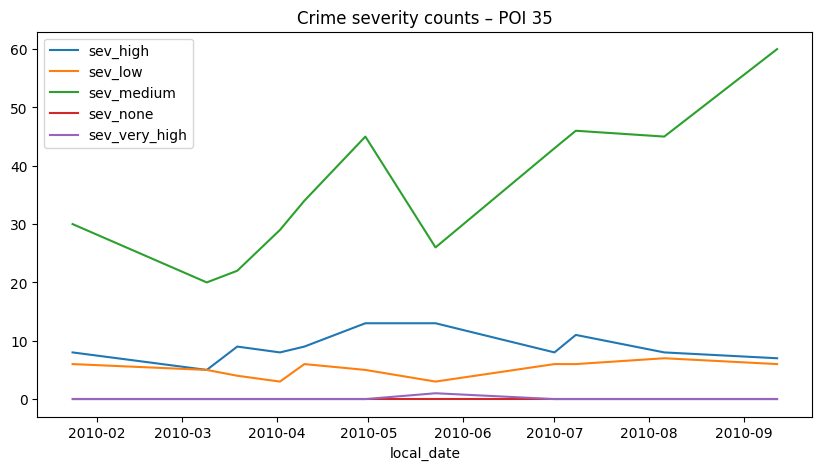

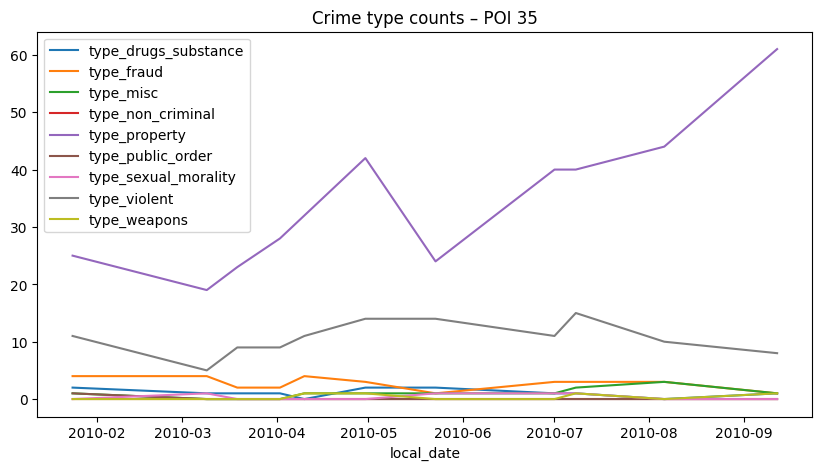

In [114]:
plot_poi_total_crime_trends(poi_id=35)

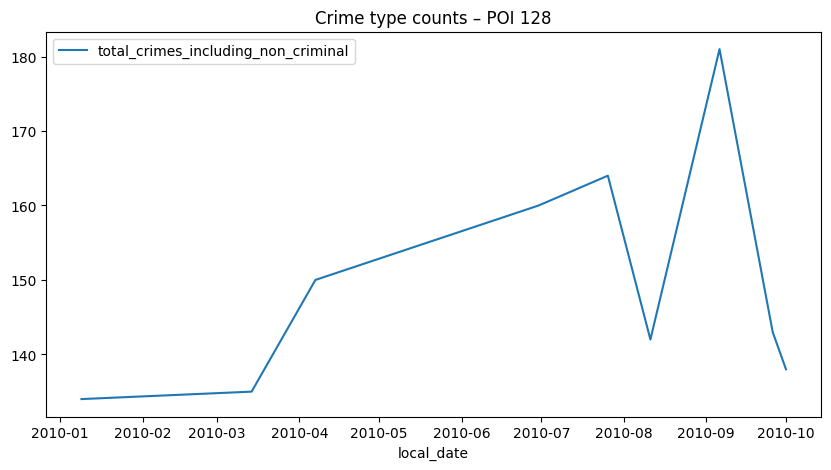

In [118]:
plot_poi_total_crimes(poi_id=128)